# Explorative Datenanalyse

## Import of required libraries
Those libraries are used in the notebook to perform the data preparation. Maybee you need to install them first with `pip install <library>`.  

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Read file into dataframe
df_tweets = pd.read_csv('..\\06_Feature Selection & Engineering\\06_dataset_tweets_featured.csv', sep=',', encoding='utf-8')
print(df_tweets.shape)
df_tweets.head

(64344, 22)


<bound method NDFrame.head of        interaction_id  tweet_id  senderuser_id  receiveruser_id  \
0                1304      1510            876             2009   
1                1998     31503            918             2436   
2                2533     27942           1409             3624   
3                2598     52129           1341             3290   
4                3511     54626            831             2812   
...               ...       ...            ...              ...   
64339           64340     45741            781               45   
64340           64341     35213           2164              402   
64341           64343      1749           1132              531   
64342           64344     17969           1026             3618   
64343           64345     31440           2629             1521   

        cyberbullying_type interaction_timestamp  char_count  \
0        not_cyberbullying               41:34.9          20   
1      other_cyberbullying           

Drop the Column 'tweet_text'

In [10]:
df_tweets = df_tweets[['cyberbullying_type', 'harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']]

In [11]:
df_tweets['cyberbullying_type'].unique()

array(['not_cyberbullying', 'other_cyberbullying', 'none', 'gender',
       'sexism', 'age', 'ethnicity', 'religion', 'racism', nan],
      dtype=object)

## Data Cleaning and Preparation
This step is in the File Folder "04_Data Cleansing".

## Declaration of the data

In [12]:
df_tweets.shape

(64344, 11)

In [13]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64344 entries, 0 to 64343
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cyberbullying_type  64342 non-null  object 
 1   harass              64343 non-null  float64
 2   cyberstalk          64343 non-null  float64
 3   flaming             64343 non-null  float64
 4   outing              64343 non-null  float64
 5   doxing              64343 non-null  float64
 6   exclusion           64343 non-null  float64
 7   impersonation       64343 non-null  float64
 8   trolling            64343 non-null  float64
 9   hateSpeech          64343 non-null  float64
 10  threats             64343 non-null  float64
dtypes: float64(10), object(1)
memory usage: 5.4+ MB


### Non Graphical Univariate EDA

#### Summary statistics of numeric variables

In [14]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].describe()

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats
count,64343.000000,64343.000000,64343.000000,64343.000000,64343.00000,64343.00000,64343.000000,64343.000000,64343.000000,64343.000000
mean,0.051055,0.035559,0.009558,0.008439,0.01736,0.00373,0.009931,0.015604,0.107082,0.024944
std,0.220111,0.185190,0.097298,0.091477,0.13061,0.06096,0.099160,0.123938,0.309220,0.155957
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


#### Quantiles
As the colums only have the value 0 or 1, the Quantiles are set accordingly.

In [15]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95], axis=0, numeric_only=True).round(2)

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats
0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0.95,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Measures of dispersion

In [16]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].var()

harass           0.048449
cyberstalk       0.034295
flaming          0.009467
outing           0.008368
doxing           0.017059
exclusion        0.003716
impersonation    0.009833
trolling         0.015361
hateSpeech       0.095617
threats          0.024323
dtype: float64

In [17]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].std()

harass           0.220111
cyberstalk       0.185190
flaming          0.097298
outing           0.091477
doxing           0.130610
exclusion        0.060960
impersonation    0.099160
trolling         0.123938
hateSpeech       0.309220
threats          0.155957
dtype: float64

#### Skewness

In [18]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].skew()

harass            4.079398
cyberstalk        5.015973
flaming          10.081525
outing           10.747525
doxing            7.390779
exclusion        16.282258
impersonation     9.884728
trolling          7.816991
hateSpeech        2.541423
threats           6.092324
dtype: float64

The skewness of the values are <0, which means they're right-skewed.

#### Kurtosis

In [19]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].kurtosis()

harass            14.641943
cyberstalk        23.160704
flaming           99.640251
outing           113.512821
doxing            52.625251
exclusion        263.120117
impersonation     95.710832
trolling          59.107191
hateSpeech         4.458971
threats           35.117501
dtype: float64

The kurtosis values are all pretty high, which means they have a high peak.

#### Extreme values
Because the fields only have the values 0 or 1, there are no extreme values.

In [20]:
for column in df_tweets.columns:
    # Get unique values in the current column
    unique_values = df_tweets[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values in '{column}' column:{unique_values}\n")

Unique values in 'cyberbullying_type' column:['not_cyberbullying' 'other_cyberbullying' 'none' 'gender' 'sexism' 'age'
 'ethnicity' 'religion' 'racism' nan]

Unique values in 'harass' column:[ 0.  1. nan]

Unique values in 'cyberstalk' column:[ 0.  1. nan]

Unique values in 'flaming' column:[ 0.  1. nan]

Unique values in 'outing' column:[ 0.  1. nan]

Unique values in 'doxing' column:[ 0.  1. nan]

Unique values in 'exclusion' column:[ 0.  1. nan]

Unique values in 'impersonation' column:[ 0.  1. nan]

Unique values in 'trolling' column:[ 0.  1. nan]

Unique values in 'hateSpeech' column:[ 0.  1. nan]

Unique values in 'threats' column:[ 0.  1. nan]



## Non Graphical Multivariate EDA

### Cross-tabulation

In [21]:
pd.crosstab(df_tweets['harass'], df_tweets['cyberbullying_type'])

cyberbullying_type,age,ethnicity,gender,none,not_cyberbullying,other_cyberbullying,racism,religion,sexism
harass,,,,,,,,,
0.0,7289,7810,7445,11186,7100,7384,1908,7609,3326
1.0,671,132,501,272,823,413,57,373,43


### Pivot Tables

In [22]:
pd.pivot_table(df_tweets[['cyberbullying_type', 'harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']],
               index=['cyberbullying_type'],
               values=['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats'],
               aggfunc=np.mean)

,cyberstalk,doxing,exclusion,flaming,harass,hateSpeech,impersonation,outing,threats,trolling
cyberbullying_type,,,,,,,,,,
age,0.040829,0.016960,0.008920,0.008040,0.084296,0.062060,0.013693,0.012312,0.029523,0.012563
ethnicity,0.032360,0.011584,0.002770,0.012339,0.016620,0.124780,0.007681,0.005162,0.011710,0.009821
gender,0.035238,0.014221,0.004027,0.027183,0.063051,0.257110,0.011075,0.005286,0.036622,0.026932
none,0.028626,0.018677,0.002007,0.004451,0.023739,0.039448,0.004015,0.008815,0.020859,0.017542
not_cyberbullying,0.030039,0.013126,0.002019,0.003029,0.103875,0.029156,0.002398,0.006311,0.013631,0.012495
other_cyberbullying,0.030653,0.021547,0.001539,0.003976,0.052969,0.039118,0.004104,0.010645,0.012825,0.021932
racism,0.052417,0.020356,0.002545,0.007634,0.029008,0.115522,0.019847,0.007125,0.053944,0.009669
religion,0.051366,0.027437,0.006264,0.011902,0.046730,0.101102,0.027186,0.013029,0.049486,0.009396
sexism,0.032057,0.009498,0.002671,0.006233,0.012763,0.397744,0.008311,0.002968,0.011279,0.013951


### Correlation Matrix

In [23]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].corr()

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats
harass,1.000000,0.013035,0.053413,0.004074,0.021069,0.013606,0.006677,0.047139,-0.007025,0.139926
cyberstalk,0.013035,1.000000,-0.001612,0.007056,0.003393,0.015785,0.012930,0.007651,0.017640,0.009109
flaming,0.053413,-0.001612,1.000000,-0.003824,0.001619,0.001850,0.007881,0.227355,0.083243,0.010917
outing,0.004074,0.007056,-0.003824,1.000000,0.493756,0.013865,0.009608,0.002093,-0.010520,0.010300
doxing,0.021069,0.003393,0.001619,0.493756,1.000000,-0.000325,0.052690,0.000548,-0.008701,0.010787
exclusion,0.013606,0.015785,0.001850,0.013865,-0.000325,1.000000,0.004156,0.004639,0.004370,0.014735
impersonation,0.006677,0.012930,0.007881,0.009608,0.052690,0.004156,1.000000,0.002566,0.001812,0.004081
trolling,0.047139,0.007651,0.227355,0.002093,0.000548,0.004639,0.002566,1.000000,0.054135,0.009613
hateSpeech,-0.007025,0.017640,0.083243,-0.010520,-0.008701,0.004370,0.001812,0.054135,1.000000,0.010033
threats,0.139926,0.009109,0.010917,0.010300,0.010787,0.014735,0.004081,0.009613,0.010033,1.000000


### Covariance Matrix

In [24]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].cov()

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats
harass,0.048449,0.000531,0.001144,0.000082,0.000606,0.000183,0.000146,0.001286,-0.000478,0.004803
cyberstalk,0.000531,0.034295,-0.000029,0.000120,0.000082,0.000178,0.000237,0.000176,0.001010,0.000263
flaming,0.001144,-0.000029,0.009467,-0.000034,0.000021,0.000011,0.000076,0.002742,0.002504,0.000166
outing,0.000082,0.000120,-0.000034,0.008368,0.005899,0.000077,0.000087,0.000024,-0.000298,0.000147
doxing,0.000606,0.000082,0.000021,0.005899,0.017059,-0.000003,0.000682,0.000009,-0.000351,0.000220
exclusion,0.000183,0.000178,0.000011,0.000077,-0.000003,0.003716,0.000025,0.000035,0.000082,0.000140
impersonation,0.000146,0.000237,0.000076,0.000087,0.000682,0.000025,0.009833,0.000032,0.000056,0.000063
trolling,0.001286,0.000176,0.002742,0.000024,0.000009,0.000035,0.000032,0.015361,0.002075,0.000186
hateSpeech,-0.000478,0.001010,0.002504,-0.000298,-0.000351,0.000082,0.000056,0.002075,0.095617,0.000484
threats,0.004803,0.000263,0.000166,0.000147,0.000220,0.000140,0.000063,0.000186,0.000484,0.024323


## Graphical Univariate EDA
Most Graphics like Line, Histograms, Density Plots, QQ-Plots or Barcharts don't make sense, as the values are mostly 0 or 1.

### Boxplot (seaborn)
Boxplot doesn't really make sense, as the values are only 0 and 1.

<Axes: xlabel='impersonation'>

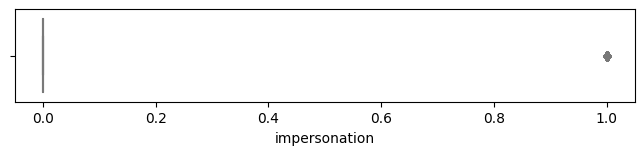

In [25]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['impersonation'], color="lightblue")

### Piechart (matplotlib)

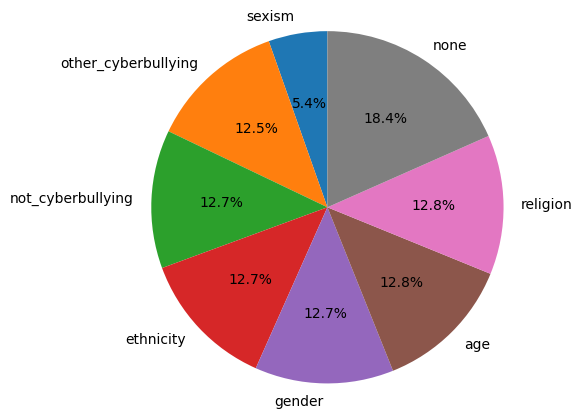

In [26]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df_tweets.cyberbullying_type.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Graphical Multivariate EDA
Most Graphics like Scatterplots, Regressionlines, Matrices, Hexagonal binning plots or Correlation heatmaps don't make sense, as the values are mostly 0 or 1.

### Example Correlation heatmap:

<Axes: >

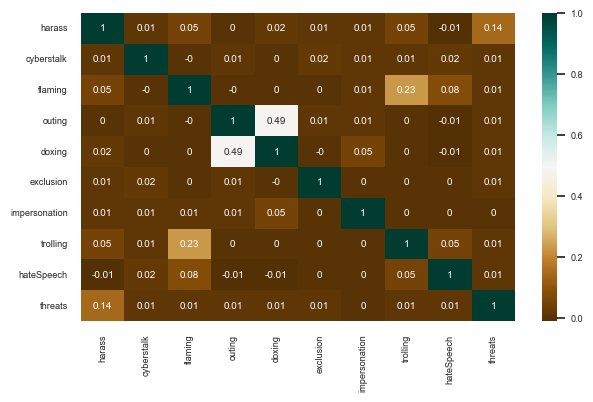

In [27]:
# Set font size for plot
sns.set(font_scale=0.6)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)